In [1]:
from displacement import Displacement
from calculationResonance import CalculationResonance
import numpy as np

boundary: 3.10
loss function: 3.1
m=constant - page 14  bölüm 2.5


Deep makalesinde 4.1i anla - 8. formüle  bak



In [2]:
disp=Displacement(nu=0.25,s=0.9194016867619661)

In [3]:
omega=np.array([0.1,0.2,0.3,0.4,0.5,1,1.5,2,2.5,3,4,5,6,8,10,11,12])
#omega=np.linspace(0.001,12,25)

In [4]:
omega

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  4. ,
        5. ,  6. ,  8. , 10. , 11. , 12. ])

In [5]:
disp.A(omega)


array([ 0.10659106,  0.21318212,  0.31977318,  0.42636424,  0.5329553 ,
        1.0659106 ,  1.59886589,  2.13182119,  2.66477649,  3.19773179,
        4.26364238,  5.32955298,  6.39546358,  8.52728477, 10.65910596,
       11.72501656, 12.79092715])

In [6]:
disp.V3RefinedPlate()


array([-5.02571097e+01, -1.27541275e+01, -5.80486371e+00, -3.36786016e+00,
       -2.23504421e+00, -6.85338172e-01, -3.59260167e-01, -2.25405257e-01,
       -1.54723284e-01, -1.12482210e-01, -6.66908605e-02, -4.38616187e-02,
       -3.09411291e-02, -1.76898681e-02, -1.14098172e-02, -9.45253056e-03,
       -7.95751768e-03])

In [7]:
disp.V3SimpleComposite()

array([-49.99609782, -12.51581814,  -5.59100478,  -3.17993641,
        -2.07422642,  -0.66601055,  -0.46861813,  -0.43728606,
        -0.44285083,  -0.45456158,  -0.46746492,  -0.46160991,
        -0.44354716,  -0.39423704,  -0.34551251,  -0.32370761,
        -0.30381865])

In [8]:
disp.V3Rayleigh()

array([-41.748383  , -20.8741915 , -13.91612767, -10.43709575,
        -8.3496766 ,  -4.1748383 ,  -2.78322553,  -2.08741915,
        -1.66993532,  -1.39161277,  -1.04370958,  -0.83496766,
        -0.69580638,  -0.52185479,  -0.41748383,  -0.37953075,
        -0.34790319])

In [9]:
disp.V3Exact()

array([-50.20269645, -12.70309463,  -5.75931407,  -3.3296885 ,
        -2.20588509,  -0.71589001,  -0.45486801,  -0.38107889,
        -0.36570516,  -0.37586489,  -0.42602596,  -0.47405309,
        -0.49254688,  -0.45021257,  -0.37939225,  -0.34777971,
        -0.3200754 ])

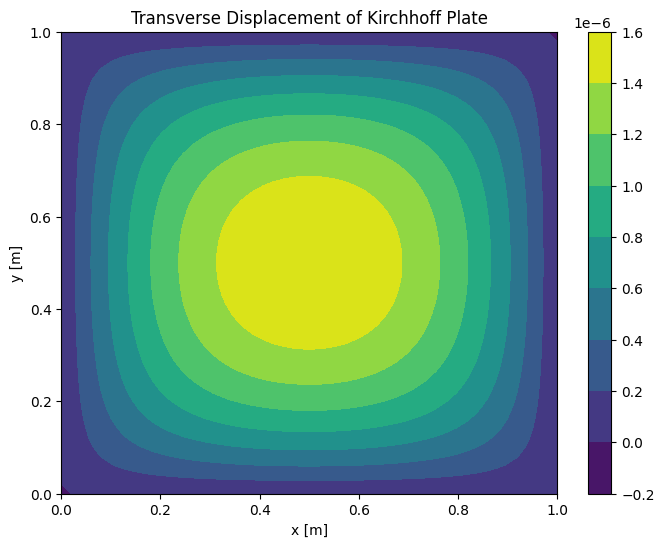

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Plate properties
E = 210e9      # Young's modulus in Pascals
nu = 0.3       # Poisson's ratio
h = 0.01       # Plate thickness in meters
q0 = 1000      # Uniform load in Pascals

# Flexural rigidity
D = E * h**3 / (12 * (1 - nu**2))

# Discretization parameters
Lx = Ly = 1.0  # Plate dimensions
N = 50         # Number of grid points along one dimension
dx = Lx / (N - 1)  # Grid spacing

# Load distribution (uniform load)
q = np.ones((N, N)) * q0

# Create grid
x = np.linspace(0, Lx, N)
y = np.linspace(0, Ly, N)
X, Y = np.meshgrid(x, y)

# Initialize the displacement field
w = np.zeros((N, N))

# Finite difference coefficients
coeff = D / dx**4
A = np.zeros((N*N, N*N))
b = np.zeros(N*N)

def index(i, j):
    return i * N + j

# Fill the matrix A and vector b
for i in range(1, N-1):
    for j in range(1, N-1):
        A[index(i, j), index(i, j)] = 4 * coeff
        A[index(i, j), index(i+1, j)] = -coeff
        A[index(i, j), index(i-1, j)] = -coeff
        A[index(i, j), index(i, j+1)] = -coeff
        A[index(i, j), index(i, j-1)] = -coeff
        b[index(i, j)] = q[i, j]

# Apply boundary conditions (simply supported)
for i in range(N):
    A[index(0, i), index(0, i)] = 1
    A[index(N-1, i), index(N-1, i)] = 1
    A[index(i, 0), index(i, 0)] = 1
    A[index(i, N-1), index(i, N-1)] = 1

# Solve the linear system
w_flat = solve(A, b)
w = w_flat.reshape((N, N))

# Plot the results
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, w, cmap='viridis')
plt.colorbar(cp)
plt.title('Transverse Displacement of Kirchhoff Plate')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()


In [11]:
import torch
ti = 0                      # initial time
tf = 1                      # final time
nt = 300                    # number of time points
t_train = torch.linspace(ti, tf, nt).reshape(-1, 1).requires_grad_(True)
t_boundary = torch.tensor(0.).view(-1,1).requires_grad_(True)

In [12]:
t_boundary.data

tensor([[0.]])